In [11]:
import numpy as np
import pandas as pd

In [12]:
premonitory = pd.read_csv(r"..\data\earthquakes_and_premonitory.csv")

In [13]:
premonitory.head()

,Unnamed: 0,significance,magnitudo,state,longitude,latitude,depth,date,n_tremors_14_days,n_tremors_13_days,...,avg_sign_of_ptremors_10_days,avg_sign_of_ptremors_9_days,avg_sign_of_ptremors_8_days,avg_sign_of_ptremors_7_days,avg_sign_of_ptremors_6_days,avg_sign_of_ptremors_5_days,avg_sign_of_ptremors_4_days,avg_sign_of_ptremors_3_days,avg_sign_of_ptremors_2_days,avg_sign_of_ptremors_1_days
0,3194670,554,6.0,South Sandwich Islands region,-25.2678,-58.0284,22.0,2021-11-01 00:02:48.965000+00:00,0.0,3.0,...,321.333333,359.75,354.0,NaN,377.0,298.0,NaN,321.2,344.666667,NaN
1,3194974,557,6.0,Indonesia,96.7090,0.2081,8.0,2021-11-01 17:04:16.557000+00:00,0.0,0.0,...,NaN,NaN,NaN,298.0,NaN,NaN,NaN,284.0,NaN,NaN
2,3196884,559,6.0,Indonesia,124.2812,-0.0451,34.0,2021-11-06 14:37:36.731000+00:00,0.0,1.0,...,NaN,NaN,NaN,NaN,298.0,NaN,369.0,305.0,NaN,NaN
3,3197954,680,6.3,Nicaragua,-86.5255,11.2198,20.0,2021-11-09 06:25:14.907000+00:00,0.0,0.0,...,NaN,390.00,NaN,312.0,NaN,NaN,NaN,NaN,NaN,545.0
4,3198468,688,6.6,Japan,126.4474,23.5935,12.0,2021-11-10 15:45:13.652000+00:00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
premonitory_full = premonitory.copy()
premonitory_full.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
premonitory_full.fillna(0, inplace = True)
premonitory_full.columns

Index(['ID', 'significance', 'magnitudo', 'state', 'longitude', 'latitude',
       'depth', 'date', 'n_tremors_14_days', 'n_tremors_13_days',
       'n_tremors_12_days', 'n_tremors_11_days', 'n_tremors_10_days',
       'n_tremors_9_days', 'n_tremors_8_days', 'n_tremors_7_days',
       'n_tremors_6_days', 'n_tremors_5_days', 'n_tremors_4_days',
       'n_tremors_3_days', 'n_tremors_2_days', 'n_tremors_1_days',
       'avg_magn_of_ptremors_14_days', 'avg_magn_of_ptremors_13_days',
       'avg_magn_of_ptremors_12_days', 'avg_magn_of_ptremors_11_days',
       'avg_magn_of_ptremors_10_days', 'avg_magn_of_ptremors_9_days',
       'avg_magn_of_ptremors_8_days', 'avg_magn_of_ptremors_7_days',
       'avg_magn_of_ptremors_6_days', 'avg_magn_of_ptremors_5_days',
       'avg_magn_of_ptremors_4_days', 'avg_magn_of_ptremors_3_days',
       'avg_magn_of_ptremors_2_days', 'avg_magn_of_ptremors_1_days',
       'avg_sign_of_ptremors_14_days', 'avg_sign_of_ptremors_13_days',
       'avg_sign_of_ptremors

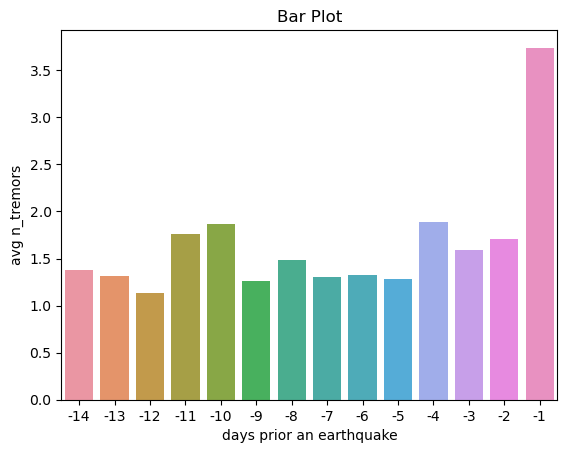

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

categ = np.array([n for n in range(-14,0)])
values = [np.mean(premonitory_full["n_tremors_{}_days".format(i)]) for i in range(14,0,-1)]
sns.barplot(x=categ, y=values)
plt.xlabel('days prior an earthquake')
plt.ylabel('avg n_tremors')
plt.title('Bar Plot')
plt.show()

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

y = premonitory_full.magnitudo
X = premonitory_full.drop(columns = ['ID', 'significance', 'magnitudo', 'state','date'])
X.fillna(0, inplace = True)
rf_regressor = RandomForestRegressor()

cv_scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = np.mean(cv_scores)
print("Mean Cross-Validation Score:", mean_cv_score)

Mean Cross-Validation Score: -0.19158434418604636


In [ ]:
from sklearn.cluster import KMeans
X_1 = premonitory_full.loc[:,["latitude","longitude"]]
kmeans = KMeans(n_clusters = 4, random_state = 0)
X_1["Cluster"] = kmeans.fit_predict(X_1)
X_1["Cluster"] = X_1["Cluster"].astype("category")
plot = sns.relplot(
    x = "longitude", y = "latitude", hue = "Cluster", data = X_1, palette = "bright", height = 6, aspect = 2
)
plot.ax.grid(True)

img = plt.imread("C:/Users/DIEGO MEZA/OneDrive/Documentos/Project_Earthquakes/map.jpg")
#img_extent = [X_1["longitude"].min(), X_1["longitude"].max(), X_1["latitude"].min(), X_1["latitude"].max()]
img_extent = [-180,180,80,-80]
plot.ax.imshow(img, extent=img_extent, aspect="auto", zorder=-1)

custom_yticks = [-90, -80, -60, -40, -20, 0, 20, 40, 60, 80, 90]
custom_xticks = [-180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plot.ax.set_xticks(custom_xticks)
plot.ax.set_yticks(custom_yticks)

plt.show()

In [ ]:
premonitory_full["location_cluster"] = X_1.Cluster
premonitory_full.columns

In [ ]:
features = premonitory_full[['location_cluster', 'nTremors_1_days_earlier',
       'nTremors_2_days_earlier', 'nTremors_3_days_earlier',
       'nTremors_4_days_earlier', 'nTremors_5_days_earlier',
       'nTremors_6_days_earlier', 'nTremors_7_days_earlier',]]
target = premonitory_full.magnitudo

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

# Crear un pipeline con escalado y modelo
model1 = make_pipeline(scaler1, LinearRegression())
model2 = make_pipeline(scaler1, RandomForestRegressor())
model3 = make_pipeline(scaler2, Ridge())
model4 = make_pipeline(scaler1, GradientBoostingRegressor())

# Realizar validación cruzada
cv_scores = cross_val_score(model3, features, target, cv=5, scoring='r2')

# Imprimir los resultados de la validación cruzada
print("Cross-validated R2 Scores:", cv_scores)
print("Mean R2 Score:", cv_scores.mean())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1]:
x1_data = earthquakes_and_premonitory_2["Number_of_Tremors_1days"]
x3_data = earthquakes_and_premonitory_2["Number_of_Tremors_3days"]
x5_data = earthquakes_and_premonitory_2["Number_of_Tremors_5days"]
x7_data = earthquakes_and_premonitory_2["Number_of_Tremors_7days"]
y_data = earthquakes_and_premonitory_2["magnitudo"]

plt.figure(figsize=(10, 6))

# Subgráfico 1
plt.subplot(2, 2, 1)
plt.scatter(x1_data, y_data)
m1, b1 = np.polyfit(x1_data, y_data, 1)
plt.plot(x1_data, m1 * np.array(x1_data) + b1, color='red')
plt.title('Gráfico 1')
plt.xlabel('Eje X1')
plt.ylabel('Eje Y1')

# Subgráfico 2
plt.subplot(2, 2, 2)
plt.scatter(x3_data, y_data)
m3, b3 = np.polyfit(x3_data, y_data, 1)
plt.plot(x3_data, m3 * np.array(x3_data) + b3, color='red')
plt.title('Gráfico 2')
plt.xlabel('Eje X2')
plt.ylabel('Eje Y2')

# Subgráfico 3
plt.subplot(2, 2, 3)
plt.scatter(x5_data, y_data)
m5, b5 = np.polyfit(x5_data, y_data, 1)
plt.plot(x5_data, m5 * np.array(x5_data) + b5, color='red')
plt.title('Gráfico 3')
plt.xlabel('Eje X3')
plt.ylabel('Eje Y3')

# Subgráfico 4
plt.subplot(2, 2, 4)
plt.scatter(x7_data, y_data)
m7, b7 = np.polyfit(x7_data, y_data, 1)
plt.plot(x7_data, m7 * np.array(x7_data) + b7, color='red')
plt.title('Gráfico 4')
plt.xlabel('Eje X4')
plt.ylabel('Eje Y4')

# Ajustar diseño y mostrar la figura
plt.tight_layout()
plt.show()

NameError: name 'earthquakes_and_premonitory_2' is not defined

In [ ]:
x1_data = earthquakes_and_premonitory_2["Avg_Magnitude_1days"]
x3_data = earthquakes_and_premonitory_2["Avg_Magnitude_3days"]
x5_data = earthquakes_and_premonitory_2["Avg_Magnitude_5days"]
x7_data = earthquakes_and_premonitory_2["Avg_Magnitude_7days"]
y_data = earthquakes_and_premonitory_2["magnitudo"]

plt.figure(figsize=(10, 6))

# Subgráfico 1
plt.subplot(2, 2, 1)
plt.scatter(x1_data, y_data)
m1, b1 = np.polyfit(x1_data, y_data, 1)
plt.plot(x1_data, m1 * np.array(x1_data) + b1, color='red')
plt.title('Gráfico 1')
plt.xlabel('Eje X1')
plt.ylabel('Eje Y1')

# Subgráfico 2
plt.subplot(2, 2, 2)
plt.scatter(x3_data, y_data)
m3, b3 = np.polyfit(x3_data, y_data, 1)
plt.plot(x3_data, m3 * np.array(x3_data) + b3, color='red')
plt.title('Gráfico 2')
plt.xlabel('Eje X2')
plt.ylabel('Eje Y2')

# Subgráfico 3
plt.subplot(2, 2, 3)
plt.scatter(x5_data, y_data)
m5, b5 = np.polyfit(x5_data, y_data, 1)
plt.plot(x5_data, m5 * np.array(x5_data) + b5, color='red')
plt.title('Gráfico 3')
plt.xlabel('Eje X3')
plt.ylabel('Eje Y3')

# Subgráfico 4
plt.subplot(2, 2, 4)
plt.scatter(x7_data, y_data)
m7, b7 = np.polyfit(x7_data, y_data, 1)
plt.plot(x7_data, m7 * np.array(x7_data) + b7, color='red')
plt.title('Gráfico 4')
plt.xlabel('Eje X4')
plt.ylabel('Eje Y4')

# Ajustar diseño y mostrar la figura
plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = earthquakes_and_premonitory_2.drop(columns = ['date','state']).corr()
sns.set(style="whitegrid")  # Configuración del estilo del gráfico
plt.figure(figsize=(10, 8))  # Tamaño de la figura

# Crear el heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()